Design a genetic algorithm to solve the polynomial fitting problem that we did in Homework #1. You need to implement a genetic algorithm using BOTH mutation AND crossover operations. You need to decide a mutation rate and crossover rate.

Plot the following in one figure: 1. the original noisy data, 2. the polynomial you obtained in Homework #1 and 3. the polynomial obtained from this implementation. Compare and discuss the difference in performance of the two polynomials obtained with two different methods.

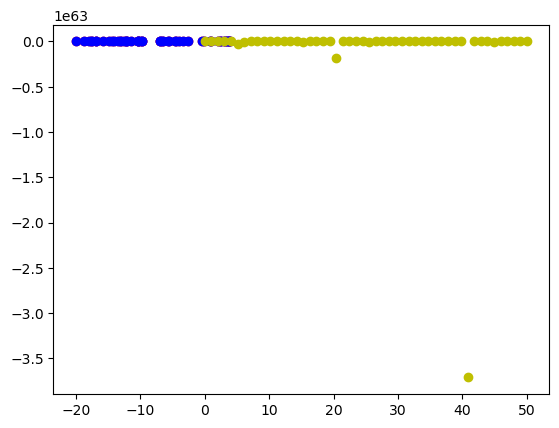

In [46]:
#Step 1: Plot the original noisy data.
import matplotlib.pyplot as plt
import numpy as np

noise_scale = 100
number_of_samples = 50
x = 25 * (np.random.rand(number_of_samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale * np.random.randn(number_of_samples, 1)
plt.plot(x, y, 'ro')

#Step 2: Plot the polynomial from Hw 1
coefficients = np.polyfit(x.flatten(), y.flatten(), 3)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), 'bo')

#Step 3: Plot the polynomial from genetic algorithm

#Create Population
populationSize = 100
degree = len(x) - 1
population = []
for i in range(populationSize):
    population.append(np.random.rand(degree + 1))

#Begin genetic algorithm
generations = 100
crossover = 0.8
mutation = 0.1
scores = []
for i in range(generations):

    scores = []
    #Test Fitness
    for j in population:
        predicted = np.polyval(j, x)
        error = np.sum((predicted - y)**2)
        scores.append(-error)

    #Select individuals based on fitness
    selectedIndices = np.argsort(scores)[-int(crossover * populationSize):]
    selectedPopulation = []
    for j in selectedIndices:
        selectedPopulation.append(population[j])

    offspring = []
    #Perform crossover
    for j in range(populationSize - len(selectedPopulation)):
        indices = np.random.randint(0, len(selectedPopulation), size = 2)
        p1 = selectedPopulation[indices[0]]
        p2 = selectedPopulation[indices[1]]
        p1 = p1.flatten()
        p2 = p2.flatten()
        a = np.random.rand()
        child = a * p1 + (1 - a) * p2

        #perform mutation
        mask = np.random.rand(len(child)) < mutation
        perturbations = 0.1 * np.random.randn(len(child))
        child += mask * perturbations
        offspring.append(child)
    
    Population = selectedPopulation + offspring
best = Population[np.argmax(scores)]

xRange = np.linspace(0, 50)
yBest = np.polyval(best, x)

plt.plot(xRange, yBest, 'yo')
plt.show()

    

        









While the genetic algorithm has worse performance to to its repeated amount of iterations, its result is much more accurate than the previous method of plotting the polynomial.